In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se importan las librerias necesarias

In [107]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot

from scipy import optimize

%matplotlib inline

Se obtiene el dataset como csv y declaran los valores de layerSize y numero de labels

In [108]:
input_layer_size  = 14

num_labels = 6

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/spotify_songs-preparado.csv')

# Dividir los datos en características (X) y etiquetas (y)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

y[y == 6] = 0

m = y.size

In [109]:
print(X[0,:])
print(y)

[ 6.7000e+01  7.2600e-01  8.1500e-01  1.1000e+01 -4.9690e+00  1.0000e+00
  3.7300e-02  7.2400e-02  4.2100e-03  3.5700e-01  6.9300e-01  9.9972e+01
  1.6260e+05]
[1 1 1 ... 0 0 0]


In [110]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [111]:
X_norm, mu, sigma = featureNormalize(X)

In [112]:
m, n = X.shape

X = X_norm

In [113]:
rand_indices = np.random.choice(m, 6567, replace=False)
sel = X[rand_indices, :]

Se separan los datos de entrenamiento y prueba, en 80% y 20% respectivamente

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [115]:
def sigmoid(z):

    return 1.0 / (1.0 + np.exp(-z))

In [116]:
def lrCostFunction(theta, X, y, lambda_):

    m = y.size

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)

    grad = grad + (lambda_ / m) * temp

    return J, grad

In [117]:
def plot_cost_history(cost_history):
    pyplot.plot(cost_history)
    pyplot.xlabel('Iteración')
    pyplot.ylabel('Costo')
    pyplot.title('Historia del Costo durante el Entrenamiento')
    pyplot.show()

In [118]:
def oneVsAll(X, y, num_labels, lambda_):

    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    cost_history = []

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x
        cost_history.append(res.fun)
        plot_cost_history(cost_history)

    return all_theta

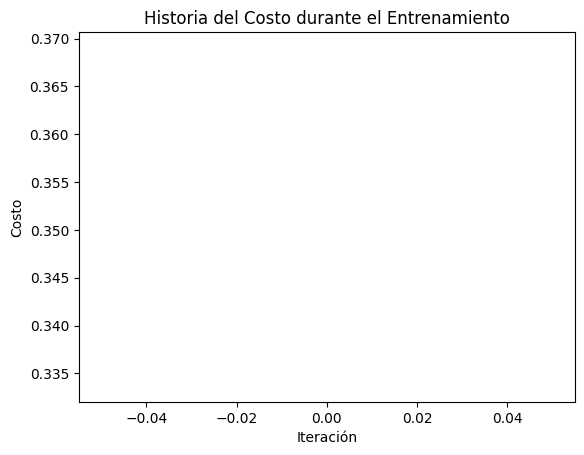

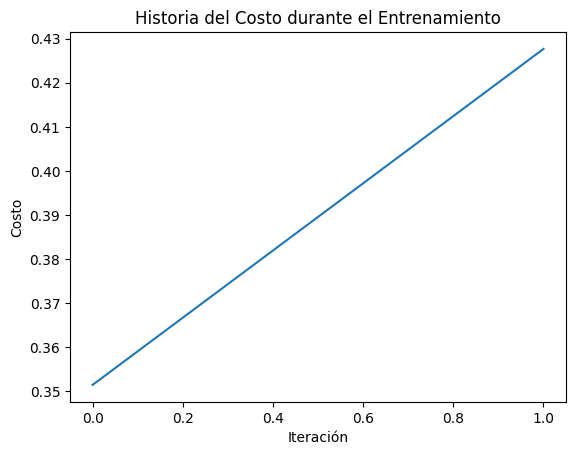

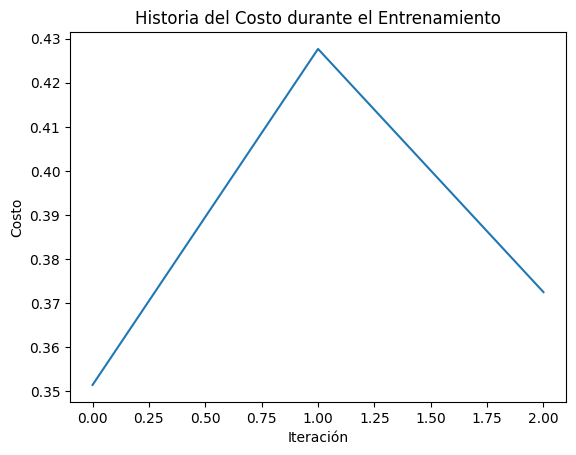

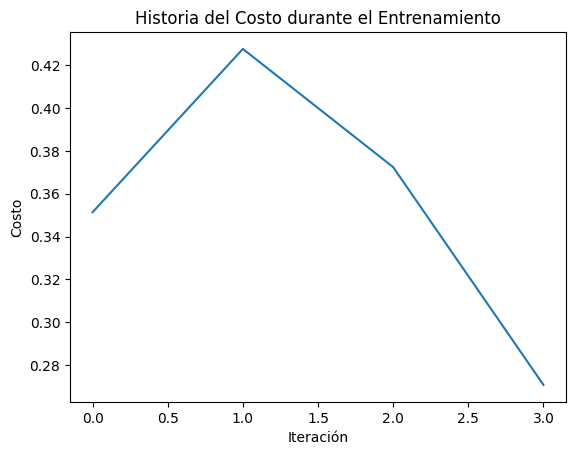

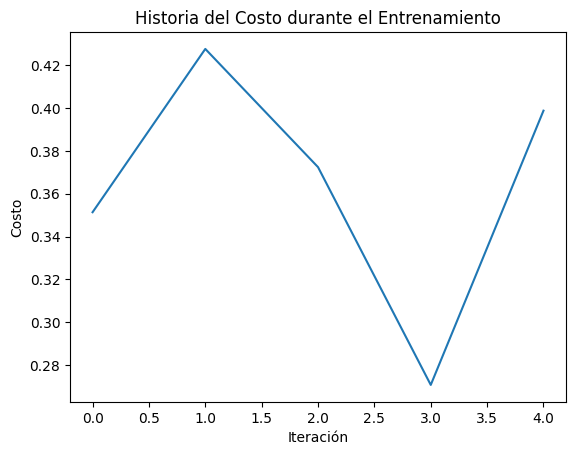

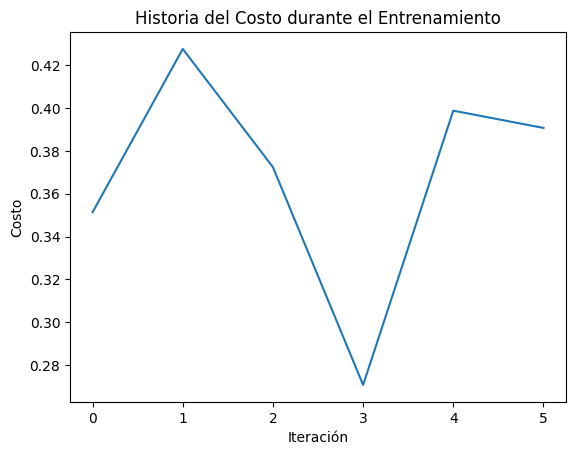

(6, 14)


In [119]:
lambda_ = 0.1
all_theta = oneVsAll(X_train, y_train, num_labels, lambda_)
print(all_theta.shape)

In [120]:
print(all_theta)
print(all_theta.size)

[[-2.07416455e+00 -2.90452309e-01  4.70074185e-01  6.34591601e-01
   4.42398332e-03  4.20238089e-01 -1.21292502e-01 -3.51912735e-01
  -3.11126223e-01  5.21049543e-01  1.04197054e-01 -7.76072996e-01
   2.18648965e-01 -1.95990918e-01]
 [-1.75875742e+00  2.19435949e-01 -9.71168748e-02 -1.29134219e-01
  -9.39937323e-03  2.27646606e-01  2.86013996e-02 -6.17932687e-01
  -5.09940729e-02 -1.32663610e-01 -9.59173218e-02  1.99962847e-03
  -3.97753369e-03 -1.91162321e-01]
 [-1.90111821e+00 -5.71681947e-02  5.41457260e-01 -3.15586387e-01
   1.43768102e-02  5.25985045e-02 -4.39541657e-02  8.54535057e-01
  -4.99198108e-02  3.35385793e-02  6.89669045e-02 -2.23904143e-01
   3.99302986e-02 -1.59635858e-01]
 [-2.93092135e+00  1.29001588e-01 -1.46736393e+00  7.73297120e-01
  -2.23363221e-02 -8.50253055e-01  2.39579243e-01 -1.16028481e+00
  -1.45408613e-01 -3.35926533e-01 -6.21154682e-02  6.48905534e-01
  -5.18251304e-02  3.15577339e-01]
 [-1.89377731e+00  1.44532705e-01  4.92456643e-01  1.69475642e-01
  

In [121]:
def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [122]:
print(X_train.shape)
pred = predictOneVsAll(all_theta, X_train)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_train) * 100))
XPrueba = X_test

XPrueba = np.concatenate([np.ones((XPrueba.shape[0], 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)


print(y_test)

(26265, 13)
Precision del conjuto de entrenamiento: 47.01%
(6567, 14)
[3 4 0 ... 2 2 3]
[1 4 1 ... 2 2 1]


In [123]:
predicciones_prueba = predictOneVsAll(all_theta, X_test)

precision_prueba = np.mean(predicciones_prueba == y_test) * 100
print('Precisión en el conjunto de prueba: {:.2f}%'.format(precision_prueba))

Precisión en el conjunto de prueba: 47.05%
